
Module Title: Machine Learning

Machine Learning [ B9DA109] for Continuous Assessment 2 Task 2

Group Members:

Name: Md Salah Uddin (10621659)

Name: Gowtham Goud Panjula (10620870)

Name: Aneesh Kalita (10617414)

Course Title: Machine Learning

Lecturer Name: Satya Prakash

Module/Subject Title: B9DA109 Machine Learning and Pattern Recognition (B9DA109_2223_TMD1S)

Assignment Title: Machine Learning Tasks FASHION MNIST

# Assignment on Deep Neural Networks using Convolutional networks and Transfer Learning using a Pretrainded Model Part 1 -**CONVOLUTIONAL NETWORKS**

### The kaggle.json file has been provided in the zip assignment folder. kindly upload the file when prompted  to run the project

In [ ]:
# The required packages and libraries for implementation of this project are imported

import numpy as np
import pandas as pd
import os
import PIL

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split as tts



from tqdm import tqdm
import cv2

import pathlib

import PIL
import PIL.Image


#### A dictionary containing the target class labels as keys and the name of cloth or footwear as values is created for reference

In [ ]:
num_list=np.arange(0,10,1,dtype='int')                                     # A numpy array consisting of 10 integers ; 0-9

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]    # A list is created containing cloth names

classNameslabels={}                                                        # An empty dict is created
for index,value in enumerate(num_list):                                    # A for loop is generated and if the index count value of loop is less than 10,
  if index <10:                                                            # the classsname dictionary is updated with respective cloth names
      classNameslabels.update({value: classNames[index]})

In [ ]:
print(classNameslabels)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [ ]:
len(classNameslabels)

10

In [ ]:
! pip install -q kaggle                       # Kaggle package is installed to import training and test data

### Kaggle json File has been provided to zip. Kindly upload the json file to run the code

In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir ~/.kaggle                    
!touch ~/.kaggle/kaggle.json

api_token = {"username":"aneeshkalita","key":"2c91f43115955cd4f257d63d039d6856"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file) 

!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist
! unzip fashionmnist.zip -dfashionmnist

fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fashionmnist.zip
replace fashionmnist/fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fashionmnist/fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fashionmnist/t10k-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fashionmnist/t10k-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fashionmnist/train-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fashionmnist/train-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df_train=pd.read_csv('/content/fashionmnist/fashion-mnist_train.csv')                          # A pandas dataframe is created for train data

In [ ]:
df_test=pd.read_csv('/content/fashionmnist/fashion-mnist_test.csv')                            # A pandas dataframe is created for test data

We can see the data is of greyscale images with shape (28 * 28 * 1=784) containing 784 pixel values and 1 label column (=785 total columns). There are 60000 images(number of rows). Each pixel is stored as an integer of value 0 to 255 indicating the brightness of that pixel. 0 represents white and gradually progresses to 255 (black).

In [ ]:
df_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


Checking Missing Values in both case: Train & Test

In [ ]:
missing=0
for i in df_train.isnull().sum():
    if i>0  :
      missing=missing+1
if missing==0:
  print('There are no missing values') 

There are no missing values


In [ ]:
missing=0
for i in df_test.isnull().sum():
    if i>0  :
      missing=missing+1
if missing==0:
  print('There are no missing values')

There are no missing values


Since the convolutional 2d layers accept only 4 dimensional tensors, we have to convert the data into numpy arrays first. And later we shall create joint tensor datasets using these numpy arrays. A function is created with the input as csv data. A numpy array with the dimensions of csv data is created. Further, we extract the label class columns and x train data.

In [ ]:
image_height=28                                         # The image dimensions are set and saved into variables which in our case is 28 * 28 * 1 (Greyscale Images)
image_width=28
num_classes=10                                          # We have 10 classes hence an variable is created 

def process_data(csv):

  fashion_np_array=np.loadtxt(csv, delimiter=',', skiprows=1)
  

  Y=fashion_np_array[:,0]                             # All the rows and first column
  Y.astype('int32')                                   # Label array is cast as int32 to reduce computational memory load of neural network model

  X=fashion_np_array[:,1:]                            # All the rows and and all  columns leaing the first

  num_images=X.shape[0]                               # The num of images is the first element of X shape tuple(num of rows)

  X_reshaped=X.reshape( num_images,image_height, image_width, 1)        # The train data(image pixel values) array is reshaped into appropriate dimensions with one colour channel(greyscale)

  X_reshaped=X_reshaped.astype('float32')/255         # The input image data is rescaled to contain values between 0 and 1. this facilitates a standardisation of the range of the whole dataset

  return X_reshaped, Y                                # image data array and label array are returned


In [ ]:
train_csv_file_path='/content/fashionmnist/fashion-mnist_train.csv'                         #train data csv path
        
image_data_full,label_full=process_data(train_csv_file_path)                                # The train image pixel data and label class data are obtained by calling process function

In [ ]:
test_csv_file_path='/content/fashionmnist/fashion-mnist_test.csv'                              #test data csv path
        
test_data_full,test_label_full=process_data(test_csv_file_path)                                # The test image pixel data and label class data are obtained by calling process function

In [ ]:
image_data_full.shape                                                          #shape of image data

(60000, 28, 28, 1)

In [ ]:
label_full.shape                                                               #shape of lebel data

(60000,)

In [ ]:
test_data_full.shape                                                          #shape of test data

(10000, 28, 28, 1)

In [ ]:
test_label_full.shape                                                         #shape of test data lebel

(10000,)

Train Test Split:

In [ ]:
x_train, x_val, y_train, y_val = tts(image_data_full,label_full,test_size=0.17,                         # The train data is further split into train and Validation data
                                                    random_state=2)

In [ ]:
x_train.shape                                                                                             #checking train shape value

(49800, 28, 28, 1)

In [ ]:
ds_train_images_labels=tf.data.Dataset.from_tensor_slices((x_train,y_train))                      # Joint tensorflow datasets are obtained from image pixel data slices and label data slices

ds_val_images_labels=tf.data.Dataset.from_tensor_slices((x_val,y_val))                            # for train,test and validation data respectively

ds_test_images_labels=tf.data.Dataset.from_tensor_slices((test_data_full,test_label_full))

### A figure is plotted containing ten subplots of the first 10 images of training data

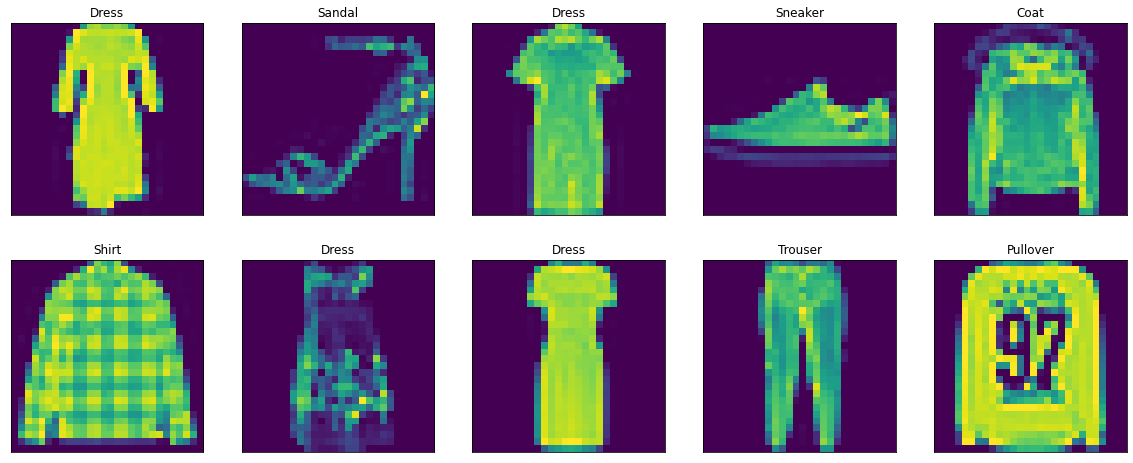

In [ ]:
fig=plt.figure(figsize=(20,8))                                                   # Figsize is set to 20*8 and the canvas created
                                                                                
for index,image in enumerate(ds_train_images_labels):                            # A for loop is generated to loop through the first 10 images

  if index<10:

    ax=fig.add_subplot(2,5,index+1)                                              # For each iamge a subplot is created

    ax.set_xticks([]);ax.set_yticks([])

    ax.imshow(np.squeeze(image[0]))                                             # The image data tensor is squeezed into a two dim numpy array and plotted

    label_index=image[1].numpy()                                                # The label data tensor(cloth class number) is saved into an a variable
    title=classNameslabels[label_index]                                         # The name of cloth is extracted from classnames dictionary using the label number which is the key of dict

    ax.set_title('{}'.format(title))                                            # The title of subplot is set as label name

    
plt.show()                              # Plot shown
 

###A figure is plotted containing ten subplots of the first 10 images of test data

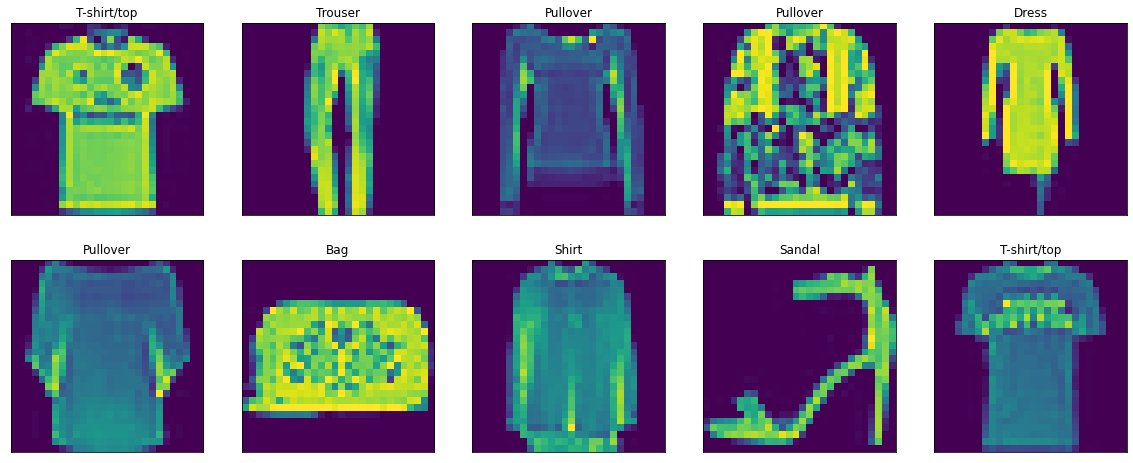

In [ ]:
fig=plt.figure(figsize=(20,8))

for index,image in enumerate(ds_test_images_labels):

  if index<10:

    ax=fig.add_subplot(2,5,index+1)

    ax.set_xticks([]);ax.set_yticks([])

    ax.imshow(np.squeeze(image[0]))
    
    label_index=image[1].numpy()
    title=classNameslabels[label_index]
    ax.set_title('{}'.format(title))
    
plt.show() 

###A figure is plotted containing ten subplots of the first 10 images of Validation data

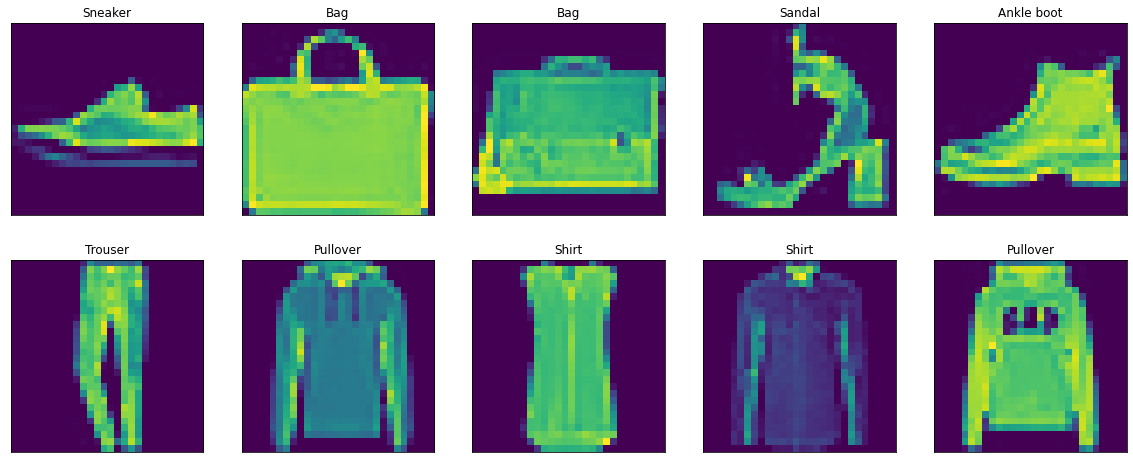

In [ ]:
fig=plt.figure(figsize=(20,8))
for index,image in enumerate(ds_val_images_labels):
  if index<10:
    ax=fig.add_subplot(2,5,index+1)
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(np.squeeze(image[0]))
    label_index=image[1].numpy()
    title=classNameslabels[label_index]
    ax.set_title('{}'.format(title))
    
plt.show() 

### If the original training data is fed to the CNN it may lead to overfitting as the model will be able to predict well on the training data but generalise poorly on new unseen data. in order to overcome this we apply random data augmentation to the data to slightly modify them. Hence the model would be able to generalise to new data. Here, we build a data augmentation pipeline consisting of random cropping, resizing to desired size and then flipping of the images horizontally at random. 

In [ ]:
def preprocess(image_data, label, size=(28, 28,1), mode='train'):      # Arguments of function are image data, label data and desired Resizing size. The mode is default as train.

    if mode == 'train':                                                      # When the mode is in train, data augmentation will be applied.

        image_cropped = tf.image.random_crop(image_data,                     # The image is randomly cropped with uniform random offset to size of 24 * 28
                                             size=(24, 28, 1))
        
        image_resized = tf.image.resize(image_cropped, size=size)            # The image is resized to a fixed size
        
        image_flip = tf.image.random_flip_left_right(image_resized)          # Image is randomly flipped horizontally
        
        return (image_flip, label)                                            # Images and labels are returned
    
    else:                                       # If mode is validation or test, to maintain uniformity between train and test images, image shall be cropped to bounding box instead of random

        image_cropped = tf.image.crop_to_bounding_box(image_data, offset_height=2, offset_width=0,            # Such that that the Centre Part of image is taken
                                                      target_height=24, target_width=28)
        
        image_resized = tf.image.resize(image_cropped, size=size)                                   
        
        return image_resized,label                                # A tuple containing images and labels are returned

### We plot a few augmented images from training data

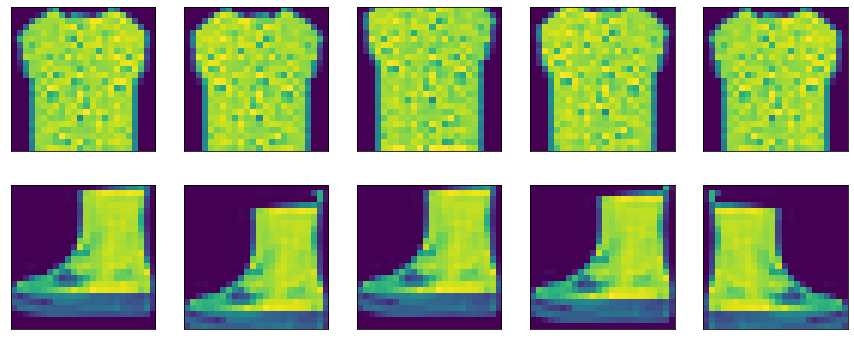

In [ ]:
tf.random.set_seed(1)

ds = ds_train_images_labels.shuffle(1000, reshuffle_each_iteration=False)                 # The train image and label tensorslice dataset is shuffled randomly
ds = ds.take(2).repeat(5)                                                         # 2 images are taken from dataset and process repeated to get 10 augmented images

ds = ds.map(lambda x,y : preprocess(x,y, size=(24, 24), mode='train'))            # each image is mapped to the preprocess function to get augmented images of size 24 * 24 

fig = plt.figure(figsize=(15, 6))

for j,example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j//2+(j%2)*5+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(np.squeeze(example[0]))
    
#plt.savefig('figures/15_16.png', dpi=300)
plt.show()

## Batch tensor datasets are created to be fed into the model

In [ ]:
BATCH_SIZE = 64                                               # Batch size of 64 is taken as it will be computationally expensive if all the data
                                                              # is fed into model for a full forward and backward propagation and updation of weights
                                                               
BUFFER_SIZE = 10000                                 # Shuffle buffer size is taken to be 10000                               

IMAGE_SIZE = (24, 24)


ds_train = ds_train_images_labels.map(lambda x,y : preprocess(x,y, size=IMAGE_SIZE, mode='train'))    #each training image is mapped to the preprocess function to get augmented images of size 24 * 24

ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE).repeat()                                         # Traing dataset is shuffled to introduce randomness of sample points and reduce bias

ds_train = ds_train.batch(BATCH_SIZE)                                                                 # A mini batch dataset of 64 images each are taken. 
                                                                                                      # When the model is trained successive batches of data will be fed

ds_val = ds_val_images_labels.map(lambda x,y : preprocess(x,y, size=IMAGE_SIZE, mode='eval'))         # #each Validation image is mapped to the preprocess function

ds_val = ds_val.batch(BATCH_SIZE)

### To facilitate efficient execution of training model we cache the data, so that once one epoch is completed and the model has seen all images atleast once, the image dataset is saved to cache. This saves memory instead of loading the images repeatedly into memory and creating an I/O bottleneck. To facilitate faster execution, the prefetch call is used to fetch the next batch of images while model is training on current batch. 

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE 

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#_, trainImageLabelInfo = np.unique(y_train_full, return_counts=True)
#_, testImageLabelInfo = np.unique(y_test, return_counts = True)

In [ ]:
# Creating Dataframe for stroing image labels metadata
# Using Dictionary concept

#pd.DataFrame({"Train":trainImageLabelInfo,
            #"Test": testImageLabelInfo}, 
            # index = classNames
            #).plot.bar()
# plt.plot()
# plt.bar()
#plt.title("Image Labels Classification for Cats and Dogs Datasets")
#plt.grid(False)
#plt.tight_layout()
#plt.show()

# **Model Creation:**

#### In artificial neural networks, the model searches for patterns and features in the global scape of the data, while in CNN the model searches for local features and patterns in data. Hence, the efficient extraction of features from images.
#### It essentially consists of a Convolutional layer. This layer acts like a filter to extract important features like horizontal and vertical edges of images, colours, textures, etc. It has a kernel size like that of a matrix. The earlier layers are used to extract low level features such as edges and the combination of these fatures are used by later layers to classify more advanced features such as eyes or face. The convolution operation is performed by placing the kernel on the input matrix and performing strides with a defined step size till the whole input tensor matrix is covered. The step size defines the amount or quality of features obtained. After one convo operation of kernel with input matrix a feature sample point is obtained and using the the activation function the feature points multiplied by weights and summed with bias are passed though activation function. 
#### The weights are initialized randomly with the help of a weight initializer in our case the Glorot uniform initializer. Repeating this process results in a feature matrix in forward propagation. In the back propagation, the weights assigned to feature points are updated by the optimizer. Here, we use Adam which is a combination of adaptive gradient descent,ie, to adaptively updating learning rate using running average of weighted moments. We choose the number of kernels or filters to pass in a convolutional layer

####Here, we use two activation functions- relu and softmax. Relu function gives the same output as input if input is greater than 0. Else, it returns a value of 0. This solves the vanishing gradient problem (as in sigmoid). The softmax activation is used for classifying multiple categories. It returns a probability of that particular class. The padding has been set to same to obtain the same output size matrix as that of the input. It is padded with zeroes.

#### The Maxpooling layer reduces the size of output feature matrix to half . This is done successively in later layers so that the pixel in later layers has maximum view on the initial input image pixel layer. Moreover, it helps in reducing the number of parameters.

#### A dropout layer is  initialized to perform regularisation to generalise well on unseen data. This layer randomly drops neurons in the layer at a desired rate. This reduces the number of parameters and reduces overfitting.

#### We build 4 hidden layers each consisting of a filter layer, a maxpooling layer and a dropout layer of kernel sizes increasing towards 32, 64, 128 to 256. Finally we add a flatten layer to flatten the features matrix into a one dimensional array to be used as input by the next Dense layer containing 128 neurons. The final dense layer is a classification layer containing 10 neurons.

In [ ]:
num_classes=10

model = Sequential([
    
    # Input Layer
    
    layers.Conv2D(filters=32, kernel_initializer='glorot_uniform', kernel_size= (3, 3), activation = "relu", input_shape = (24, 24, 1), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout( rate= 0.5),
    
    #1st Hidden Layer

    layers.Conv2D(filters= 64, kernel_initializer='glorot_uniform', kernel_size= (3, 3), activation = "relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout( rate= 0.5),
    
     #2nd Hidden Layer
    
    layers.Conv2D(filters= 128, kernel_initializer='glorot_uniform', kernel_size= (3, 3), activation = "relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout( rate= 0.5),
    #3rd Hidden Layer

    layers.Conv2D(filters= 256, kernel_initializer='glorot_uniform', kernel_size= (3, 3), activation = "relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout( rate= 0.5),

    
    layers.Flatten(),
    
    # Connected Layer
    
    layers.Dense(128, kernel_initializer="glorot_uniform", activation = "relu"),
    layers.Dense(num_classes, name="outputs")
])

# **Model Summary:**

#### We can get a summary of our model and the parameters of each layer and its dimension

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

# **Model compiling:**

#### the model is compiled with Adam optimizer and loss function is set Sparse Categorical Crossentropy. It computes loss from logits as we have not provided a softmax activation in final layer and hence there are probabilities obtained.

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

#### A forward and backward propagation is completed when the model passes through a batch size of 64 images. Hence, we give a step size of 779,ie, 779 forward and back propagations will be performed in one epoch to update weights and bias.

In [ ]:
steps_per_epoch = np.ceil(49800/BATCH_SIZE)
print(steps_per_epoch)

779.0


# **Model Fitting:**

#### The model is fitted with train dataset and validation dataset is provided. The number of epochs is set to 20 . With each epoch, the training dataset will be shuffled. The loss and accuracy of training and validation are noted with each iteration.

In [ ]:
ModelData = model.fit(ds_train,
                      validation_data=ds_val,
                      steps_per_epoch=steps_per_epoch,
                      epochs = 20, shuffle=True)

Epoch 1/20
779/779 [==============================] - 10s 8ms/step - loss: 0.9646 - accuracy: 0.6262 - val_loss: 0.5769 - val_accuracy: 0.7746
Epoch 2/20
779/779 [==============================] - 8s 10ms/step - loss: 0.6349 - accuracy: 0.7502 - val_loss: 0.5018 - val_accuracy: 0.7989
Epoch 3/20
779/779 [==============================] - 6s 7ms/step - loss: 0.5805 - accuracy: 0.7703 - val_loss: 0.4550 - val_accuracy: 0.8245
Epoch 4/20
779/779 [==============================] - 7s 10ms/step - loss: 0.5454 - accuracy: 0.7863 - val_loss: 0.4338 - val_accuracy: 0.8334
Epoch 5/20
779/779 [==============================] - 9s 11ms/step - loss: 0.5210 - accuracy: 0.7977 - val_loss: 0.4022 - val_accuracy: 0.8494
Epoch 6/20
779/779 [==============================] - 8s 11ms/step - loss: 0.5029 - accuracy: 0.8047 - val_loss: 0.3847 - val_accuracy: 0.8547
Epoch 7/20
779/779 [==============================] - 6s 7ms/step - loss: 0.4885 - accuracy: 0.8137 - val_loss: 0.3962 - val_accuracy: 0.8501
E

In [ ]:
ModelData.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot of training and validation Accuracy with each epoch 

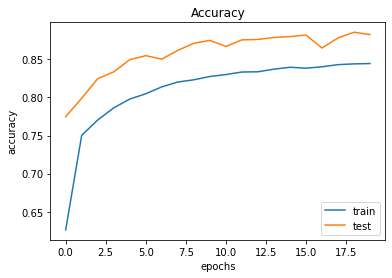

In [ ]:
plt.plot(ModelData.history['accuracy'])
plt.plot(ModelData.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower right')

### Plot of training and validation loss with each epoch

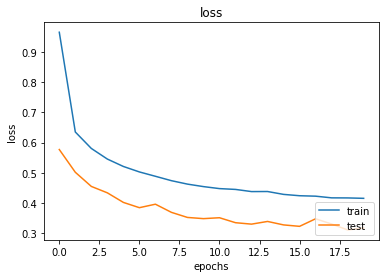

In [ ]:
plt.plot(ModelData.history['loss'])
plt.plot(ModelData.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='lower right')

#### In order to process the test the test images to the same dimensions as of training data we map each image to preprocess function and set mode to evaluate so as not to augment images.

In [ ]:
ds_test = ds_test_images_labels.map(lambda x,y : preprocess(x,y, size=IMAGE_SIZE, mode='eval'))
ds_test=ds_test.batch(BATCH_SIZE)

### Test accuracy and loss

In [ ]:
test_result=model.evaluate(ds_test)
print("The model accuracy on test is {} and the loss is {}".format(test_result[1],test_result[0]))

157/157 [==============================] - 1s 6ms/step - loss: 0.3095 - accuracy: 0.8840
The model accuracy on test is 0.8840000033378601 and the loss is 0.309476763010025


### To print the classification report we unbatch the tensor batch dataset and take 10000 test images. We iterate through the next 10000 images

In [ ]:
test_data=ds_test.unbatch().take(10000)
test_images_labels=next(iter(test_data.batch(10000)))
for i in test_data:
  print(i[1])

### The predicted logits array of 10 classes are obtained from the test set

In [ ]:
preds_logits=model.predict(test_images_labels[0])

313/313 [==============================] - 1s 3ms/step


### The probabilities of each class is obtained by passing the predicted logits array through softmax function. It results in a probability tensor matrix. Next, we choose the probability of class which is the maximum in each row (ie image) as the predicted class. The predicted classes are fed into a list.

In [ ]:
probs=tf.nn.softmax(preds_logits)
pred_classes=tf.argmax(probs,axis=1)
pred_classes_list=[]
for i in pred_classes:
  pred_classes_list.append(i.numpy())

### We obtain precision of 88 percent, ie, of all images classified as a particular class 88 perent truly belong to that class. Of all images 88 percent were classified as the target class. Weighted F1 score is 88 percent.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_images_labels[1],pred_classes_list))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82      1000
         1.0       0.99      0.99      0.99      1000
         2.0       0.79      0.86      0.82      1000
         3.0       0.88      0.94      0.91      1000
         4.0       0.86      0.75      0.80      1000
         5.0       0.99      0.96      0.97      1000
         6.0       0.67      0.57      0.62      1000
         7.0       0.92      0.97      0.95      1000
         8.0       0.99      0.98      0.99      1000
         9.0       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_images_labels[1],pred_classes_list))

[[874   0  23  26   4   0  69   0   4   0]
 [  2 986   1   9   0   1   1   0   0   0]
 [ 19   0 859  13  44   0  62   0   3   0]
 [ 18   3   3 941  11   0  24   0   0   0]
 [  0   1  84  47 751   0 117   0   0   0]
 [  0   0   0   0   0 957   1  34   1   7]
 [207   3 115  38  64   0 571   0   2   0]
 [  0   0   0   0   0   5   0 969   0  26]
 [  1   0   6   1   1   1   7   0 982   1]
 [  0   0   0   0   0   2   0  47   1 950]]


### We take a batch of 10 test images to be comapred to predicted labels and plot them

In [ ]:
test_data=ds_test.unbatch().take(10)
test_images_labels=next(iter(test_data.batch(10)))

preds_logits=model.predict(test_images_labels[0])
probs=tf.nn.softmax(preds_logits)
pred_classes=tf.argmax(probs,axis=1)
pred_classes_list=[]
for i in pred_classes:
  pred_classes_list.append(i.numpy())

1/1 [==============================] - 0s 93ms/step


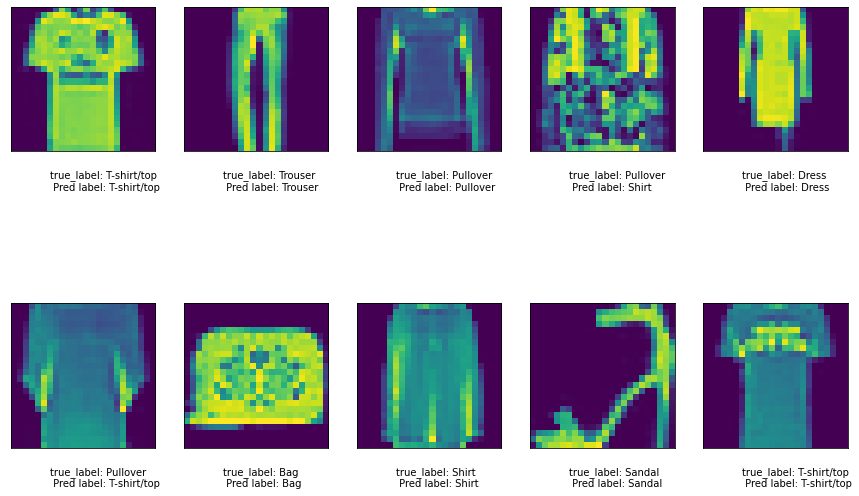

In [ ]:
fig = plt.figure(figsize=(15, 10))
for index,image in enumerate(test_data):
    ax = fig.add_subplot(2, 5, index+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(np.squeeze(image[0]))
    category=image[1].numpy()
    true_class= classNameslabels[category]
    pred_class= classNameslabels[pred_classes_list[index]]
    ax.text(6,30,'true_label: {} \n Pred label: {}'.format(true_class , pred_class), 
        )
    

plt.show()

# Transfer Learning

### There are pretrained neural network models available which are state of the art algorithms. They are trained on huge datasets to classify multiple labels. One such pretrained model is the VGG16 which is trained on the imagenet dataset containing 1.3 million images and 1000 classes. 
### These algorithms are able to extract a lot of important features and assign immensely powerful parameters to the model. In transfer learning we use the patterns learned by these models to extract new features from new images and datasets. The parameters in these models are carefully preserved and hence should not be disturbed. Therefore we freeze and use the convolutional layers of these networks. Moreover, if we unfreeze all the convolutional layers it will lead to a huge amount of parameters and generic representations learned by the model will be lost due to weight updation. Our model will easily overfit and lose the generelisation.

### The next step is to remove the final dense layer(which is anyways used to classify 1000 classes) and replace it with a dense classification layer which is randomly initialized to classify our target labels.

### A function is created to load and reshape 20000 images and labels from the original training dataset. Due to Memory Constraints the whole training set could not be used there are about 2 million parameters in the transfer learning model.

In [ ]:
image_height=28
image_width=28
num_classes=10

def get_train_data(csv):

  fashion_np_array= np.loadtxt(csv, delimiter=',', skiprows=1)
  np.random.shuffle(fashion_np_array)

  Y=fashion_np_array[0:20000,0]
  Y.astype('int32')

  X=fashion_np_array[0:20000,1:]

  num_images=X.shape[0]

  X_reshaped=X.reshape( num_images,image_height, image_width, 1)

  X_reshaped=X_reshaped.repeat(3,axis=3)                                # The final dimension of image array is repeated and duplicates created to convert greyscale image to RGB coloured
  return X_reshaped, Y                                                  # as the pretrained model only accepts images with three channels

In [ ]:
train_csv_file_path='/content/fashionmnist/fashion-mnist_train.csv'
image_data_full,label_full=get_train_data(train_csv_file_path)

In [ ]:
image_data_full.shape

(20000, 28, 28, 3)

In [ ]:
label_full.shape

(20000,)

In [ ]:
def get_test_data(csv):

  fashion_np_array=np.loadtxt(csv, delimiter=',', skiprows=1)

  Y=fashion_np_array[:,0]
  Y.astype('int32')

  X=fashion_np_array[:,1:]

  num_images=X.shape[0]

  X_reshaped=X.reshape( num_images,image_height, image_width, 1)

  X_reshaped=X_reshaped.repeat(3,axis=3)
  return X_reshaped, Y

In [ ]:
test_csv_file_path='/content/fashionmnist/fashion-mnist_test.csv'
test_data_full,test_label_full=get_test_data(test_csv_file_path)

In [ ]:
test_data_full.shape

(10000, 28, 28, 3)

### dataset is splitted to train and validatiom sets

In [ ]:
x_train, x_val, y_train, y_val = tts(image_data_full,label_full,test_size=0.2,
                                                    random_state=42)

In [ ]:
x_train.shape

(16000, 28, 28, 3)

In [ ]:
x_val.shape

(4000, 28, 28, 3)

In [ ]:
ds_train_images_labels=tf.data.Dataset.from_tensor_slices((x_train,y_train))
ds_val_images_labels=tf.data.Dataset.from_tensor_slices((x_val,y_val))
ds_test_images_labels=tf.data.Dataset.from_tensor_slices((test_data_full,test_label_full))

### Data Augmentation Pipeline

In [ ]:
def preprocess(image_data, label, target_height=24, target_width= 28, mode='train'):

    if mode == 'train':

        image_cropped = tf.image.random_crop(
            image_data, size=(24, 28, 3))
        
        image_resized = tf.image.resize_with_pad(image_cropped, target_height=target_height, target_width=target_width)
                                                 
                                                  
        
        image_flip = tf.image.random_flip_left_right(image_resized)
        
        return (image_flip, label)
    
    else:

        image_cropped = tf.image.crop_to_bounding_box(image_data, offset_height=2, offset_width=0,
                                                      target_height=24, target_width=28)
        
        image_resized = tf.image.resize_with_pad(image_cropped, target_height=target_height, target_width=target_width)
                                                 
        
        return image_resized,label

### Augmented images are plotted

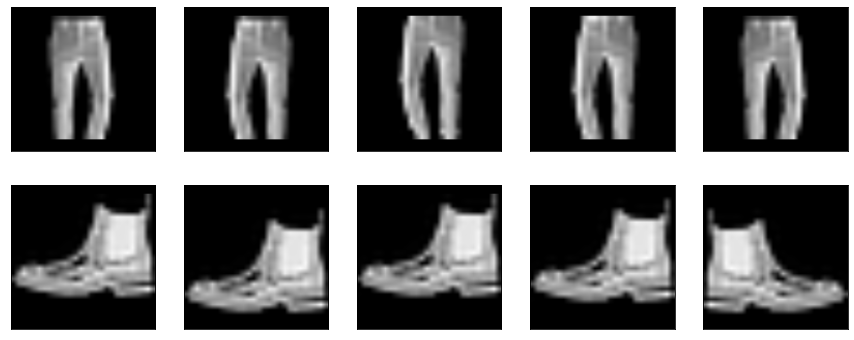

In [ ]:
tf.random.set_seed(1)

ds = ds_train_images_labels.shuffle(1000, reshuffle_each_iteration=False)
ds = ds.take(2).repeat(5)

ds = ds.map(lambda x,y : preprocess(x,y, target_height=150, target_width=150, mode='train'))

fig = plt.figure(figsize=(15, 6))

for j,example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j//2+(j%2)*5+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(np.squeeze(example[0]/255))
    

plt.show()

### Batch datasets are created from train and validation datasets to feed into model. Target size is taken 150 * 150 as pretrained model only accpts images atleast of this dimension

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000



ds_train = ds_train_images_labels.map(lambda x,y : preprocess(x,y, target_height=150, target_width=150, mode='train'))        

ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE)

ds_train = ds_train.batch(BATCH_SIZE)

ds_val = ds_val_images_labels.map(lambda x,y : preprocess(x,y, target_height=150, target_width=150, mode='eval'))

ds_val = ds_val.batch(BATCH_SIZE)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size=AUTOTUNE)

### The VGG16 pretrained model trained on imagenet database is imported and a base model created. We don't include the final top dense layer as  we have to classify only 10 labels.

In [ ]:
from keras.applications import VGG16
base_model = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

### A summary of base model is obtained with a total of 14,714,688 parameters.

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### The total convolutional network is created with an input layer of size 150 * 150 * 3. We add a rescaling layer to rescale the image array into a uniform range of 0 to 1. 

In [ ]:
from keras import models

input= keras.Input(shape=(150, 150, 3))
rescaler_layer= keras.layers.Rescaling(scale=1. / 255)

model_transfer_learn =models.Sequential()

model_transfer_learn.add(input)
model_transfer_learn.add(rescaler_layer)
model_transfer_learn.add(base_model)                                                                # Base pretrained model is added
model_transfer_learn.add(layers.Flatten())                                                          # Feature matrix is flattened into one dimensional array
model_transfer_learn.add(layers.Dropout(rate=0.5))                                                  # Dropout layer is added with a rate of 50 percent to introduce regularisation and prevent overfitting
model_transfer_learn.add(layers.Dense(10))                                                          # final dense layer is added to classify 10 classes

In [ ]:
base_model.trainable=False

### A summary of total model is obtained

In [ ]:
model_transfer_learn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_3 (Dropout)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                81930     
                                                                 
Total params: 14,796,618
Trainable params: 81,930
Non-trainable params: 14,714,688
_________________________________________________________________


### Model is compiled with Adam optimizer and loss sparse categorical Cross entropy

In [ ]:
model_transfer_learn.compile(optimizer = keras.optimizers.Adam(),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [ ]:
steps_per_epoch = np.ceil(16000/BATCH_SIZE)
print(steps_per_epoch)

250.0


### the model is fitted and trained

In [ ]:
with tf.device('/device:GPU:0'):
        model_history = model_transfer_learn.fit(ds_train,
                                                 validation_data=ds_val,
                                                 steps_per_epoch=steps_per_epoch,
                                                 epochs = 20, shuffle=True)

Epoch 1/20
250/250 [==============================] - 61s 216ms/step - loss: 0.6960 - accuracy: 0.7475 - val_loss: 0.4628 - val_accuracy: 0.8290
Epoch 2/20
250/250 [==============================] - 49s 198ms/step - loss: 0.4699 - accuracy: 0.8273 - val_loss: 0.4287 - val_accuracy: 0.8420
Epoch 3/20
250/250 [==============================] - 50s 199ms/step - loss: 0.4149 - accuracy: 0.8473 - val_loss: 0.4108 - val_accuracy: 0.8482
Epoch 4/20
250/250 [==============================] - 49s 196ms/step - loss: 0.3912 - accuracy: 0.8543 - val_loss: 0.3982 - val_accuracy: 0.8485
Epoch 5/20
250/250 [==============================] - 50s 200ms/step - loss: 0.3685 - accuracy: 0.8624 - val_loss: 0.3950 - val_accuracy: 0.8503
Epoch 6/20
250/250 [==============================] - 49s 196ms/step - loss: 0.3469 - accuracy: 0.8708 - val_loss: 0.3914 - val_accuracy: 0.8533
Epoch 7/20
250/250 [==============================] - 49s 198ms/step - loss: 0.3388 - accuracy: 0.8733 - val_loss: 0.3857 - val_ac

### Plot of training and validation accuracy

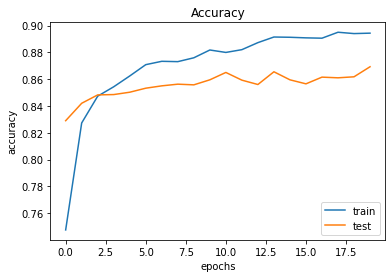

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower right')

In [ ]:
### Plot of training and validation loss

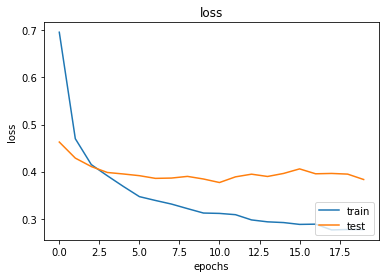

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='lower right')

In [ ]:
ds_test = ds_test_images_labels.map(lambda x,y : preprocess(x,y, target_height=150, target_width=150, mode='eval'))
ds_test=ds_test.batch(BATCH_SIZE)

### Model accuracy and loss on Test data is obtained

In [ ]:
test_result=model_transfer_learn.evaluate(ds_test)
print("The model accuracy on test is {} and the loss is {}".format(test_result[1],test_result[0]))

157/157 [==============================] - 25s 160ms/step - loss: 0.3490 - accuracy: 0.8806
The model accuracy on test is 0.8805999755859375 and the loss is 0.34900495409965515


In [ ]:
test_data=ds_test.unbatch().take(10)
test_images_labels=next(iter(test_data.batch(10)))

In [ ]:
preds_logits=model_transfer_learn.predict(test_images_labels[0])

1/1 [==============================] - 1s 1s/step


In [ ]:
probs=tf.nn.softmax(preds_logits)
pred_classes=tf.argmax(probs,axis=1)
pred_classes_list=[]
for i in pred_classes:
  pred_classes_list.append(i.numpy())

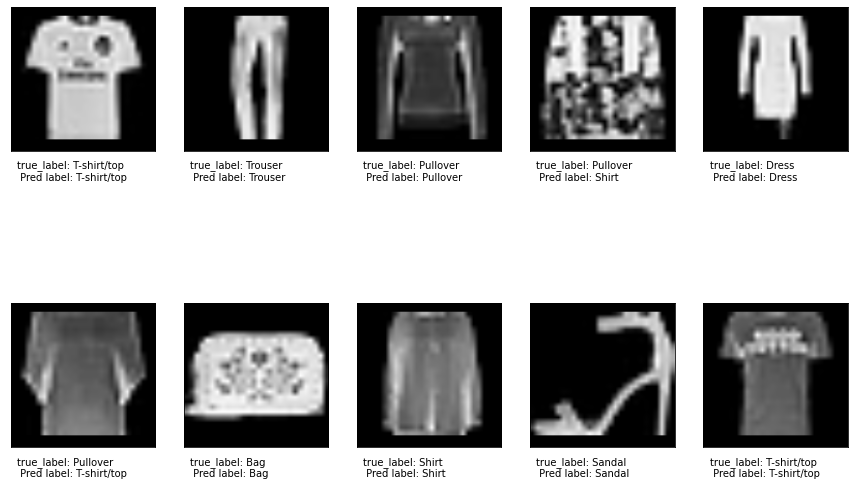

In [ ]:
fig = plt.figure(figsize=(15, 10))
for index,image in enumerate(test_data):
    ax = fig.add_subplot(2, 5, index+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow((image[0])/255)
    category=image[1].numpy()
    true_class= classNameslabels[category]
    pred_class= classNameslabels[pred_classes_list[index]]
    ax.text(6,180,'true_label: {} \n Pred label: {}'.format(true_class , pred_class), 
        )
    

plt.show()

### Now we fine tune the total convolutional model by unfreezing the final covolutional block,ie final 4 layers.

In [ ]:
base_model.trainable = True                                       # We unfreeze the pretrain model
set_layer_trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':                              # If layer name is block 5_conv1 then the parameter set_layer is set to True which will unbreeze the subsequent layerrs
        set_layer_trainable = True
    if set_layer_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model_transfer_learn.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-5),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [ ]:
for layer in base_model.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [ ]:
model_transfer_learn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_3 (Dropout)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                81930     
                                                                 
Total params: 14,796,618
Trainable params: 7,161,354
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
        model_history = model_transfer_learn.fit(ds_train,
                                                 validation_data=ds_val,
                                                 steps_per_epoch=steps_per_epoch,
                                                 epochs = 20, shuffle=True)

Epoch 1/20
250/250 [==============================] - 61s 221ms/step - loss: 0.4109 - accuracy: 0.8528 - val_loss: 0.3254 - val_accuracy: 0.8845
Epoch 2/20
250/250 [==============================] - 56s 223ms/step - loss: 0.3475 - accuracy: 0.8721 - val_loss: 0.3162 - val_accuracy: 0.8888
Epoch 3/20
250/250 [==============================] - 55s 219ms/step - loss: 0.3057 - accuracy: 0.8865 - val_loss: 0.3095 - val_accuracy: 0.8923
Epoch 4/20
250/250 [==============================] - 55s 222ms/step - loss: 0.2681 - accuracy: 0.9021 - val_loss: 0.3053 - val_accuracy: 0.8932
Epoch 5/20
250/250 [==============================] - 55s 221ms/step - loss: 0.2371 - accuracy: 0.9109 - val_loss: 0.3073 - val_accuracy: 0.8935
Epoch 6/20
250/250 [==============================] - 55s 221ms/step - loss: 0.2145 - accuracy: 0.9203 - val_loss: 0.3116 - val_accuracy: 0.8928
Epoch 7/20
250/250 [==============================] - 55s 221ms/step - loss: 0.1927 - accuracy: 0.9278 - val_loss: 0.3040 - val_ac

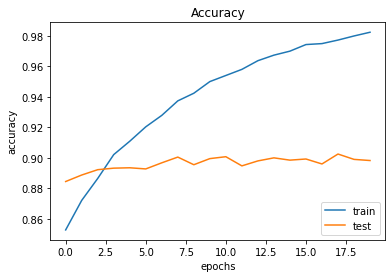

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower right')

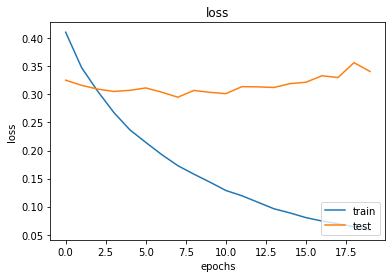

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='lower right')

In [ ]:
ds_test = ds_test_images_labels.map(lambda x,y : preprocess(x,y, target_height=150, target_width=150, mode='eval'))
ds_test=ds_test.batch(BATCH_SIZE)

In [ ]:
test_result=model_transfer_learn.evaluate(ds_test)
print("The model accuracy on test is {} and the loss is {}".format(test_result[1],test_result[0]))

157/157 [==============================] - 24s 153ms/step - loss: 0.3105 - accuracy: 0.9069
The model accuracy on test is 0.9068999886512756 and the loss is 0.3105366826057434


In [ ]:
test_data=ds_test.unbatch().take(10)
test_images_labels=next(iter(test_data.batch(10)))

In [ ]:
preds_logits=model_transfer_learn.predict(test_images_labels[0])

1/1 [==============================] - 0s 147ms/step
